# Clay Tryon
# Final Project, AI 240
# =============================================
## The purpose of this dataset is to record the conditions and information of all passengers aboard the RMS titanic. I would like to try and implement a Decision Tree to check which factors were most pertinent in survival of the passengers for example, I want to see if social status like ticket class, or coach position mattered

## The dataset can be found at https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download

## Step 1, import all modules

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


## Step 2, Gather the dataset and it's features

In [105]:
filepath = 'Titanic-Dataset.csv'
raw_df= pd.read_csv(filepath)
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3 and 4, Analyze the dataset features, and do basic visualization. Cleaning the data


In [106]:
# Survived is a binary value, of 0 and 1. A 1 indicates they survived, a 0 indicates they died. This is our target value
# Pclass shows the class of the ticket. Lower Number = more expensive
# Name is not pertinent to survival here, so this column can be dropped
# Embarked is a code for where passengers boarded the titanic. S is Southampton, C is Cherbourg France, Q is Queenstown Ireland

#Check for unique values
raw_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='HasCabin', ylabel='Survived'>

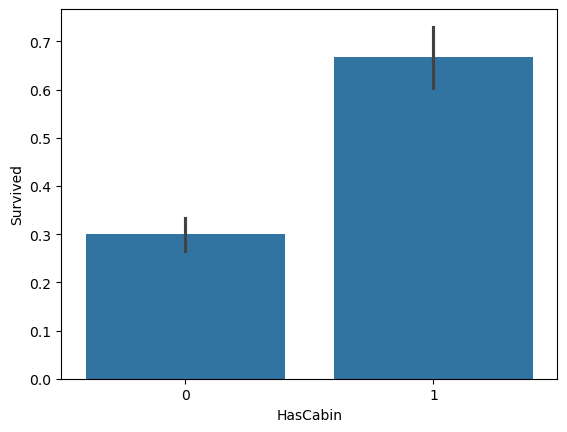

In [107]:
# Cabin is almost 600 NaN values. This is too much data to remove from our dataset in rows. Lets visualize this section compared to Survived to see if
# theres any correlation

raw_df['HasCabin'] = raw_df['Cabin'].notnull().astype(int)

sns.barplot(data=raw_df, x='HasCabin', y='Survived')


In [108]:
# This data shows that most of the people who had a Cabin name, survived. With how many people are NaN, I chose to drop this feature 
df= raw_df.drop(['Cabin', 'HasCabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [109]:
# SibSP and Parch represent whether the passenger had children, parents, or siblings aboard. I think I just want to make this a value of "FamilyAboard" 
# and sum these columns together
df['FamilyAboard'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyAboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [110]:
# Now that those columns are together, I can drop the originals
df = df.drop(['SibSp', 'Parch'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilyAboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [111]:
# It mildly annoys me that Survived is to the left of the dataset and not the right. This is a dumb thing to be annoyed about, but I chose to add a new 
# column called target, so I could drop Survived and have the data all the way to the right
df['Target'] = df['Survived']
df = df.drop('Survived', axis =1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilyAboard,Target
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0


In [112]:
# Name has too many values to be a productive predictive factor. PassengerID is just an index effectively, so it can also be dropped. 
# Same goes for Ticket. I'm dropping this column as well
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilyAboard,Target
0,3,male,22.0,7.2500,S,1,0
1,1,female,38.0,71.2833,C,1,1
2,3,female,26.0,7.9250,S,0,1
3,1,female,35.0,53.1000,S,1,1
4,3,male,35.0,8.0500,S,0,0


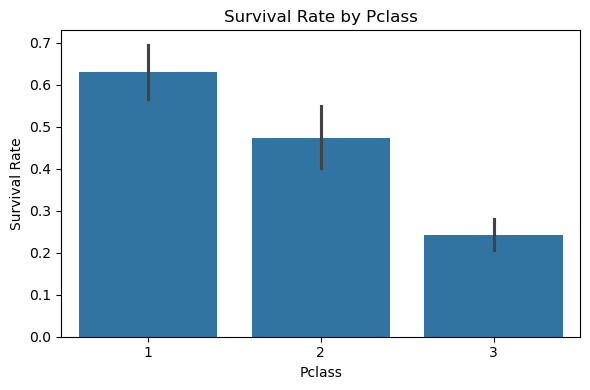

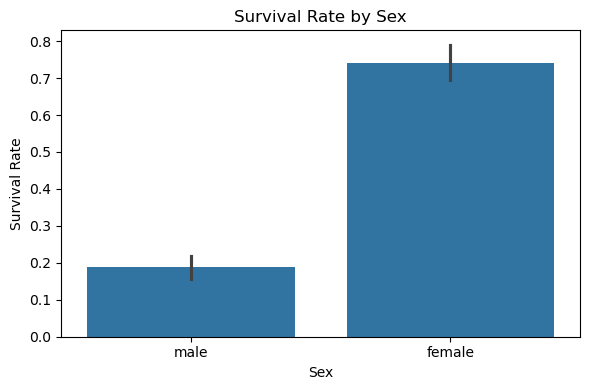

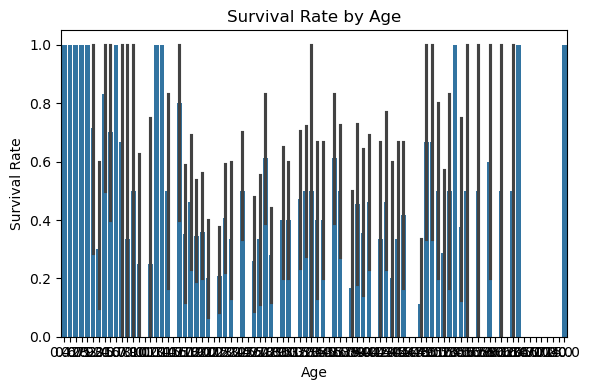

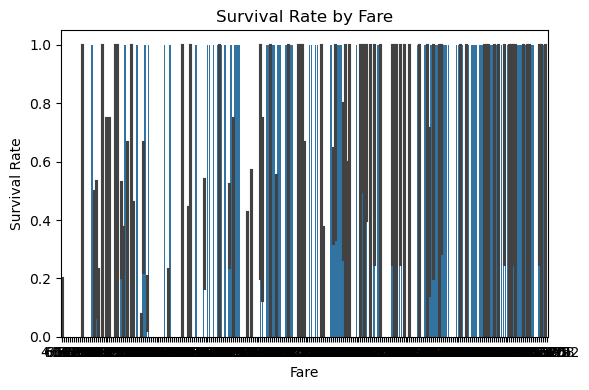

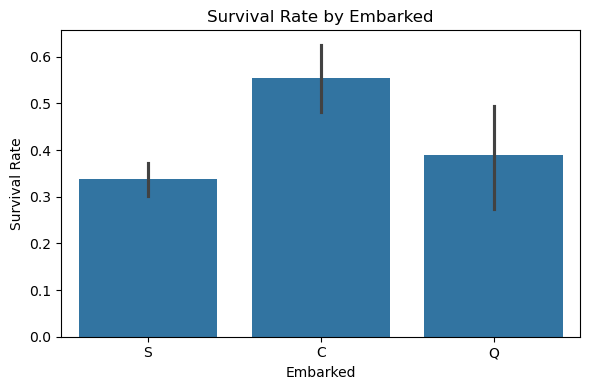

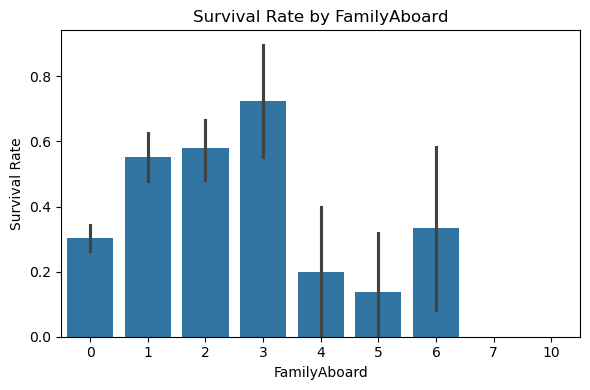

In [113]:
# Preliminary data graphs to check for trends before modeling

# List of features to visualize
features_to_plot = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilyAboard']

# Loop through features and plot survival rates
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=feature, y='Target', estimator=lambda x: sum(x)/len(x))
    plt.title(f'Survival Rate by {feature}')
    plt.ylabel('Survival Rate')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

In [114]:
# Based on these graphs, it looks like the strongest predictive factors are Sex, Passenger Class, and Family aboard
# Lets convert the string values to numbers before finally making our model

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [115]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilyAboard,Target
0,3,0,22.0,7.2500,0.0,1,0
1,1,1,38.0,71.2833,1.0,1,1
2,3,1,26.0,7.9250,0.0,0,1
3,1,1,35.0,53.1000,0.0,1,1
4,3,0,35.0,8.0500,0.0,0,0


In [116]:
print(df.dtypes)

Pclass            int64
Sex               int64
Age             float64
Fare            float64
Embarked        float64
FamilyAboard      int64
Target            int64
dtype: object


## Last Step Modeling: Implementing and evaluating machine learning model 


In [117]:
# Define features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [144]:
# I want this model to be as good as possible. As such, I looked into hyperparameter training and implemented this to check my 
# decision tree values


# Define your parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the base model
tree_model = DecisionTreeClassifier(random_state=0)

# Set up the grid search
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [145]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=2,
    random_state=0
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [146]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8212290502793296


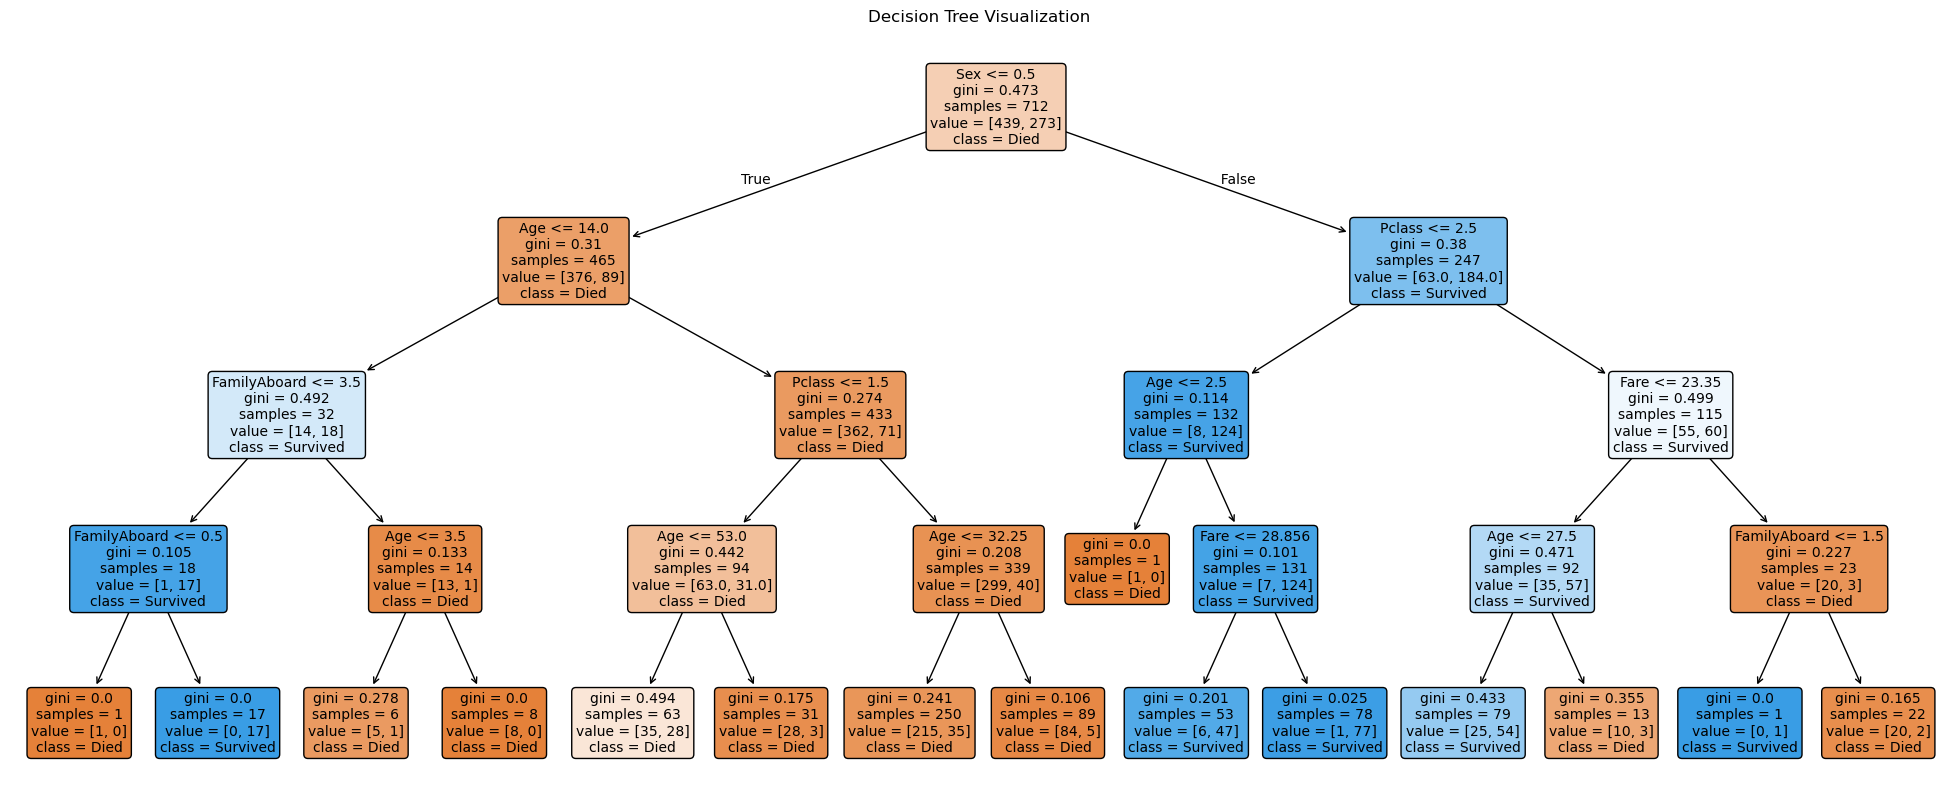

In [147]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Use either `model` or `best_model`, depending on your code
plt.figure(figsize=(25, 10))  # Adjust size as needed
plot_tree(
    model, 
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


## Evaluation: Use Evaluation Metrics to evaluate and compare if you are using more than one ML algorithm. 


In [122]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8212290502793296
Precision: 0.8363636363636363
Recall: 0.6666666666666666
F1 Score: 0.7419354838709677

Confusion Matrix:
 [[101   9]
 [ 23  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [123]:
# Overall, I'm pretty happy with this model. I do wish that the recall was higher, as 23 false negatives significantly worsened these values. 
#I want to try running it again and weighing the data differently, because I didn't weigh the different classes. There are significant changes between
# 1st, 2nd, and 3rd class passengers so they SHOULD be weighted differently. 

In [124]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    class_weight='balanced',
    random_state=0
)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=0)

In [125]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
Precision: 0.7647058823529411
Recall: 0.7536231884057971
F1 Score: 0.7591240875912408

Confusion Matrix:
 [[94 16]
 [17 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



# Could another model be better for this? 
## I want to try a random forest as well, because random forests will use many more decision trees to refine our data. The downside is that it's harder
## to analyze a specific feature here, but should be a overall better predictor

In [133]:
# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=None,  
    class_weight='balanced', 
    random_state=0
)

rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8435754189944135
Precision: 0.8360655737704918
Recall: 0.7391304347826086
F1 Score: 0.7846153846153846

Confusion Matrix:
 [[100  10]
 [ 18  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [134]:
# Out of the gate, this random forest is doing a way better job with what I would consider "Default" values. Lets add some hyperparameter tuning
# to make it as best as I can


In [148]:
# Set up parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10], 
    'criterion': ['gini', 'entropy'], 
    'class_weight': ['balanced']  
}

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Set up the grid search
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # This code takes a while to run if I don't do this, because uh. It's doing a LOT of math
    verbose=1
)

# Run grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and model
print("Best Parameters:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 50}


In [149]:
# Lets try this with best_rf_model to check improvement

# Predict using the best model from GridSearchCV
y_pred_rf = best_rf_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Accuracy: 0.8435754189944135
Precision: 0.7971014492753623
Recall: 0.7971014492753623
F1 Score: 0.7971014492753623

Confusion Matrix:
 [[96 14]
 [14 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       110
           1       0.80      0.80      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [150]:
# This is the highest F1 score we have obtained. This tells me that the hyperparameter tuned Random Forest is more optimal for this dataset than the
# single decision tree. This makes sense to me though, as Random Forest is basically a whole bunch of decision trees together. 


In [151]:
# So at the end of the day, We can see that the most important factors in an individual surviving the Titanic was their Sex, closely followed by their 
# paid fare and age. 

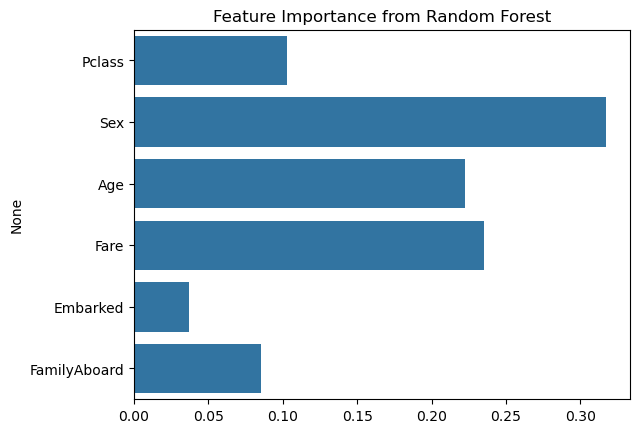

In [152]:
importances = best_rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance from Random Forest")
plt.show()
